<a href="https://colab.research.google.com/github/riofarizal/DM-A11.2020.13200-UAS-Penambangan-Data/blob/main/DM_A11_2020_13200_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langkah 1: Impor pustaka yang diperlukan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
from google.colab import files





Langkah 2: Baca file CSV menggunakan pandas
Langsung membaca file dari jalur yang telah ditentukan
Tampilkan beberapa baris data untuk memastikan

In [ ]:
file_path = '/content/Data_Tanaman_Padi_Sumatera_version_1.csv'
data = pd.read_csv(file_path)

print(data.head())


  Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
0     Aceh   1993  1329536.0    323589.0       1627.0       82.00   
1     Aceh   1994  1299699.0    329041.0       1521.0       82.12   
2     Aceh   1995  1382905.0    339253.0       1476.0       82.72   
3     Aceh   1996  1419128.0    348223.0       1557.0       83.00   
4     Aceh   1997  1368074.0    337561.0       1339.0       82.46   

   Suhu rata-rata  
0           26.06  
1           26.92  
2           26.27  
3           26.08  
4           26.31  


In [ ]:
# Pilih fitur yang ingin digunakan untuk clustering. Misalnya, semua kolom kecuali kolom pertama (jika kolom pertama adalah ID atau label)
X = data.iloc[:, 1:].values

In [ ]:
# Langkah 3: Lakukan Agglomerative Clustering dengan berbagai metode linkage dan nilai k
linkage_methods = ['complete', 'average', 'single']
cluster_counts = [2, 3, 4]
results = []

for linkage in linkage_methods:
    for k in cluster_counts:
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model.fit_predict(X)

        # Hitung metrik validasi
        silhouette_avg = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)

        # Simpan hasil
        results.append({
            'linkage': linkage,
            'k': k,
            'silhouette_score': silhouette_avg,
            'davies_bouldin_index': dbi,
            'labels': labels
        })

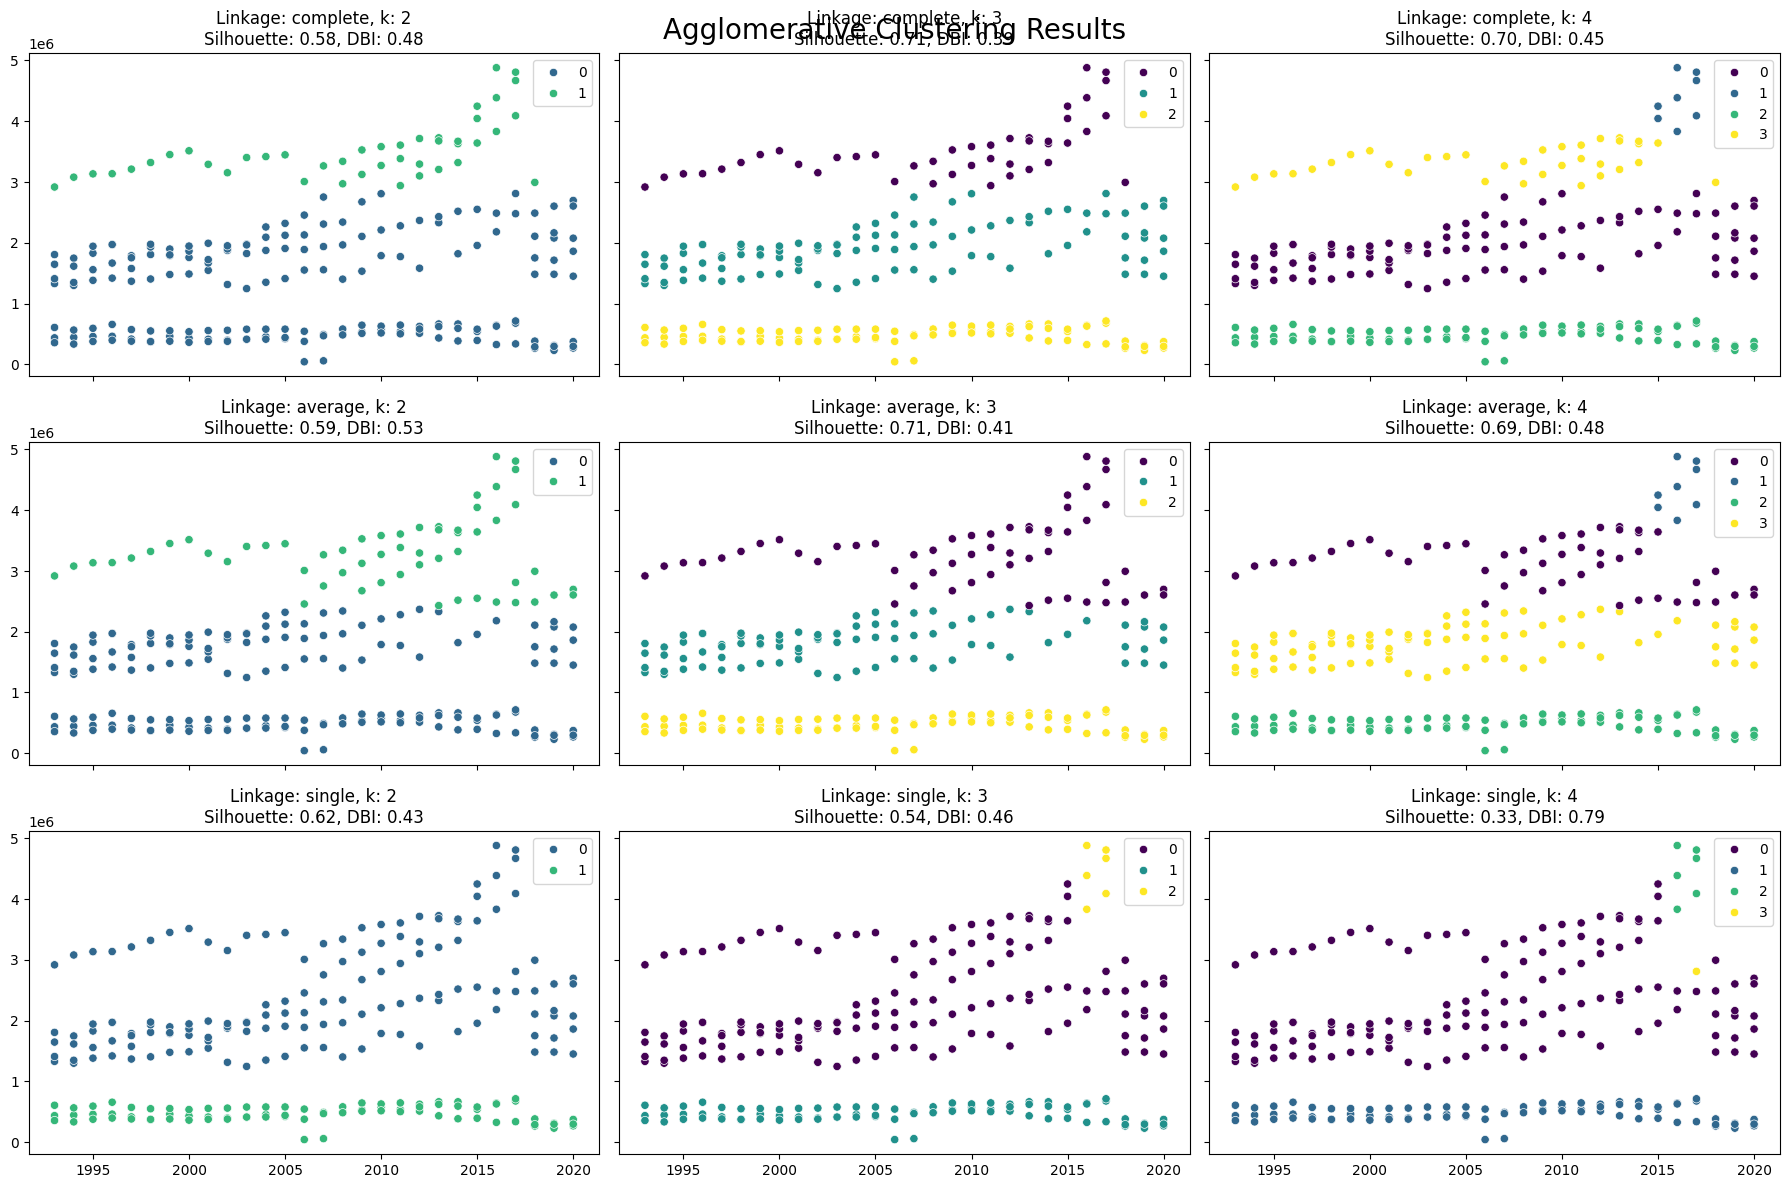

In [ ]:
# Langkah 4: Visualisasikan hasil clustering dan metrik validasi
df_results = pd.DataFrame(results)

fig, axes = plt.subplots(len(linkage_methods), len(cluster_counts), figsize=(18, 12), sharex=True, sharey=True)

for i, linkage in enumerate(linkage_methods):
    for j, k in enumerate(cluster_counts):
        ax = axes[i, j]
        result = df_results[(df_results['linkage'] == linkage) & (df_results['k'] == k)].iloc[0]
        labels = result['labels']

        # Scatter plot untuk hasil clustering
        # Untuk visualisasi, kita gunakan dua fitur pertama dalam dataset
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', ax=ax)
        ax.set_title(f'Linkage: {linkage}, k: {k}\nSilhouette: {result["silhouette_score"]:.2f}, DBI: {result["davies_bouldin_index"]:.2f}')
        ax.set_xlabel('')
        ax.set_ylabel('')

fig.suptitle('Agglomerative Clustering Results', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [ ]:
# Langkah 5: Analisa profil klaster yang terbentuk
# Misalnya, menampilkan jumlah anggota tiap klaster untuk hasil terbaik
best_result = df_results.loc[df_results['silhouette_score'].idxmax()]
best_labels = best_result['labels']
best_linkage = best_result['linkage']
best_k = best_result['k']

print(f"Hasil terbaik:\nLinkage: {best_linkage}, k: {best_k}\nSilhouette Score: {best_result['silhouette_score']:.2f}, Davies-Bouldin Index: {best_result['davies_bouldin_index']:.2f}")
print("\nJumlah anggota tiap klaster:")
unique, counts = np.unique(best_labels, return_counts=True)
print(dict(zip(unique, counts)))

Hasil terbaik:
Linkage: complete, k: 3
Silhouette Score: 0.71, Davies-Bouldin Index: 0.39

Jumlah anggota tiap klaster:
{0: 43, 1: 97, 2: 84}
